In [1]:
import pandas as pd
a=pd.read_csv('/content/archive (2).zip')
print(a)
print(a.head())
print(a.columns)
target_variable = 'Label'
features = a.columns[a.columns != target_variable]
print('Target Variable:', target_variable)
print('Features:',features)

      ID  Age  Gender  Height  Weight   BMI          Label
0      1   25    Male     175      80  25.3  Normal Weight
1      2   30  Female     160      60  22.5  Normal Weight
2      3   35    Male     180      90  27.3     Overweight
3      4   40  Female     150      50  20.0    Underweight
4      5   45    Male     190     100  31.2          Obese
..   ...  ...     ...     ...     ...   ...            ...
103  106   11    Male     175      10   3.9    Underweight
104  107   16  Female     160      10   3.9    Underweight
105  108   21    Male     180      15   5.6    Underweight
106  109   26  Female     150      15   5.6    Underweight
107  110   31    Male     190      20   8.3    Underweight

[108 rows x 7 columns]
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    

In [2]:
a.drop(labels='ID',axis=1,inplace=True)
a

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


In [3]:
y=a['Label']
y

0      Normal Weight
1      Normal Weight
2         Overweight
3        Underweight
4              Obese
           ...      
103      Underweight
104      Underweight
105      Underweight
106      Underweight
107      Underweight
Name: Label, Length: 108, dtype: object

In [4]:
X=a.drop('Label',axis=1)
X

,Age,Gender,Height,Weight,BMI
0,25,Male,175,80,25.3
1,30,Female,160,60,22.5
2,35,Male,180,90,27.3
3,40,Female,150,50,20.0
4,45,Male,190,100,31.2
...,...,...,...,...,...
103,11,Male,175,10,3.9
104,16,Female,160,10,3.9
105,21,Male,180,15,5.6
106,26,Female,150,15,5.6


In [5]:
X['Gender'] = X['Gender'].replace({'Male': 1, 'Female' : 0})
X

,Age,Gender,Height,Weight,BMI
0,25,1,175,80,25.3
1,30,0,160,60,22.5
2,35,1,180,90,27.3
3,40,0,150,50,20.0
4,45,1,190,100,31.2
...,...,...,...,...,...
103,11,1,175,10,3.9
104,16,0,160,10,3.9
105,21,1,180,15,5.6
106,26,0,150,15,5.6


In [6]:
y = y.replace({'Normal Weight':1,'Underweight':0,'Overweight':2,'Obese':3})
y

0      1
1      1
2      2
3      0
4      3
      ..
103    0
104    0
105    0
106    0
107    0
Name: Label, Length: 108, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.neighbors import KNeighborsClassifier
k_values = list(range(1, 21))
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)
print(accuracies)

[0.8181818181818182, 0.7878787878787878, 0.8181818181818182, 0.8484848484848485, 0.7575757575757576, 0.7878787878787878, 0.7575757575757576, 0.7575757575757576, 0.8181818181818182, 0.8484848484848485, 0.8484848484848485, 0.7878787878787878, 0.7878787878787878, 0.7575757575757576, 0.7878787878787878, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273]


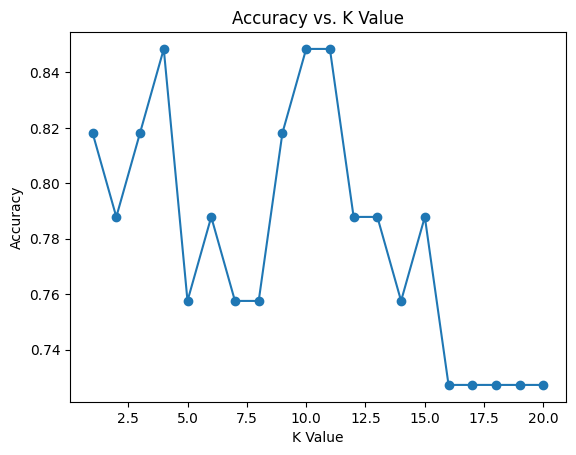

In [17]:
import matplotlib.pyplot as plt
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [18]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

In [19]:
num_samples = list(range(1, 51))
num_bootstraps = 100

In [20]:
model_names = ['Logistic Regression', 'SVM', 'Perceptron', 'KNN']
models = [LogisticRegression(), SVC(), Perceptron(), KNeighborsClassifier()]
mean_accuracies = {model: [] for model in model_names}
std_accuracies = {model: [] for model in model_names}

In [21]:
for n in num_samples:
    for _ in range(num_bootstraps):
        for model, name in zip(models, model_names):
            model.fit(X_test, y_test)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            mean_accuracies[name].append(accuracy)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [22]:
import numpy as np
for name in model_names:
    mean_accuracies[name] = np.mean(mean_accuracies[name])
    std_accuracies[name] = np.std(mean_accuracies[name])

Text(0, 0.5, 'Accuracy')

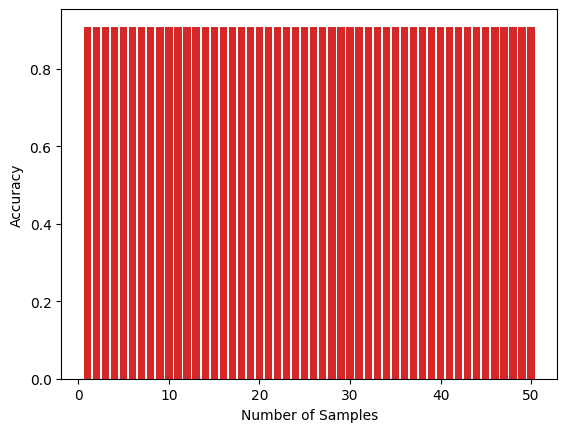

In [28]:
for name in model_names:
    plt.bar(num_samples, [mean_accuracies[name]] * len(num_samples), yerr=[std_accuracies[name]] * len(num_samples), label=name)
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')